In [2]:
import pandas as pd
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-10-04 15:06:28.005211: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-04 15:06:28.005231: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_2clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_5clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_20clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_2clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_5clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_20clusters.csv
2400


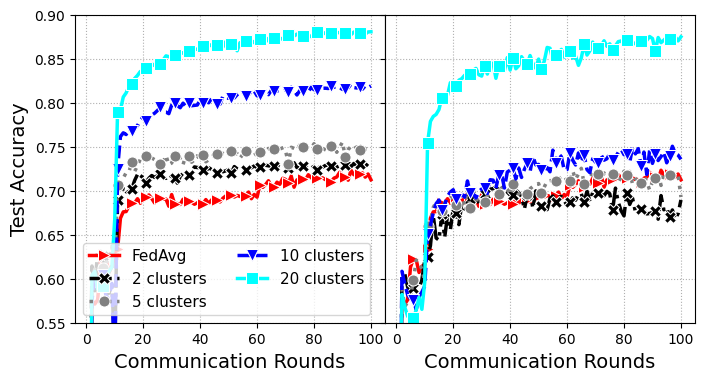

In [3]:
#comparando o numero de clusters

metric = 'CKA'
selection = 'All'
method = 'HC'

files = {'FedAvg':f'simulation1/local_logs/MotionSense/{metric}-(-1)-HC-{selection}-0.5/evaluate/acc_24clients_1clusters.csv',
         '2 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_2clusters.csv',
         '5 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_5clusters.csv' ,
         '10 clusters': f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_10clusters.csv',
         '20 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_20clusters.csv'}

solucoes = ['FedAvg','2 clusters', '5 clusters' , '10 clusters' ,'20 clusters']
colors =  {'FedAvg':'r', '2 clusters'   :'k', '5 clusters':'gray' , '10 clusters':'blue' ,'20 clusters':'cyan'}
styles =  {'FedAvg':'-', '2 clusters'   :'-.', '5 clusters':':' , '10 clusters':'--' ,'20 clusters':'-'}
markers = {'FedAvg':'>', '2 clusters'   :'X', '5 clusters':'o' , '10 clusters':'v' ,'20 clusters':'s'}

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (8,4))

for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds',
                  linewidth = 2.5, color = colors[sol], linestyle = styles[sol], marker=markers[sol], markevery = 5, markersize = 8, ax = ax1, legend='brief', label=sol,)


metric = 'CKA'
selection = 'All'
method = 'Random'

files = {'FedAvg':f'simulation1/local_logs/MotionSense/{metric}-(-1)-HC-{selection}-0.5/evaluate/acc_24clients_1clusters.csv',
         '2 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_2clusters.csv',
         '5 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_5clusters.csv' ,
         '10 clusters': f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_10clusters.csv',
         '20 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_20clusters.csv'}

solucoes = ['FedAvg','2 clusters', '5 clusters' , '10 clusters' ,'20 clusters']
colors =  {'FedAvg':'r', '2 clusters'   :'k', '5 clusters':'gray' , '10 clusters':'blue' ,'20 clusters':'cyan'}
styles =  {'FedAvg':'-', '2 clusters'   :'-.', '5 clusters':':' , '10 clusters':'--' ,'20 clusters':'-'}
markers = {'FedAvg':'>', '2 clusters'   :'X', '5 clusters':'o' , '10 clusters':'v' ,'20 clusters':'s'}


for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds',
                  linewidth = 2.5, color = colors[sol], linestyle = styles[sol], marker=markers[sol], markevery = 5, markersize = 8, ax = ax2)
    

ax1.set_ylim(0.55, 0.9)
ax1.grid(True, linestyle = ':')
ax2.set_ylim(0.55, 0.9)
ax1.legend(ncol = 2, fontsize=11)
ax2.grid(True, linestyle = ':')

ax1.set_xlabel('Communication Rounds', size = 14)
ax1.set_ylabel('Test Accuracy', size  = 14)
#ax1.set_xticks(size = 16)
#ax1.set_yticks(size = 16)


ax2.set_xlabel('Communication Rounds', size = 14)
ax2.set_ylabel('Test Accuracy', size  = 14)
#ax2.set_xticks(size = 16)
#ax2.set_yticks(size = 16)


plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(f'figures/n_clusters_comp_{method}.pdf', dpi = 600, bbox_inches='tight')
plt.show()



simulation1/local_logs/MotionSense/CKA-(-1)-HC-Random-0.5/evaluate/acc_24clients_10clusters.csv
2398
simulation1/local_logs/MotionSense/weights-(-1)-HC-Random-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-KCenter-Random-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-Random-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-POC-0.5/evaluate/acc_24clients_10clusters.csv
2399
simulation1/local_logs/MotionSense/weights-(-1)-HC-POC-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-KCenter-POC-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-POC-0.5/evaluate/ac

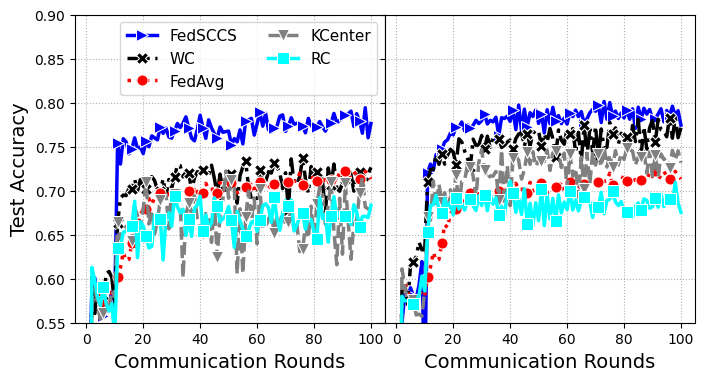

In [4]:
#comparando as soluções

n_clusters = 10
selection = 'Random'
method = 'HC'


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (8,4))

files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

solucoes = ['FedSCCS', 'WC', 'FedAvg' , 'KCenter' ,'RC']
colors =  {'FedSCCS':'blue', 'WC'   :'k', 'FedAvg':'r' , 'KCenter':'gray' ,'RC':'cyan'}
styles =  {'FedSCCS':'-', 'WC'   :'-.',   'FedAvg':':' ,    'KCenter':'--' ,  'RC':'-'}
markers = {'FedSCCS':'>', 'WC'   :'X',    'FedAvg':'o' ,    'KCenter':'v' ,   'RC':'s'}

for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds', legend='brief', label=sol,
                  linewidth = 2.5, color = colors[sol], linestyle = styles[sol], marker=markers[sol], markevery = 5, markersize = 8, ax = ax1)
    

n_clusters = 10
selection = 'POC'
method = 'HC'

files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

solucoes = ['FedSCCS', 'WC', 'FedAvg' , 'KCenter' ,'RC']
colors =  {'FedSCCS':'blue', 'WC'   :'k', 'FedAvg':'r' , 'KCenter':'gray' ,'RC':'cyan'}
styles =  {'FedSCCS':'-', 'WC'   :'-.',   'FedAvg':':' ,    'KCenter':'--' ,  'RC':'-'}
markers = {'FedSCCS':'>', 'WC'   :'X',    'FedAvg':'o' ,    'KCenter':'v' ,   'RC':'s'}

for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds', legend='brief', 
                  linewidth = 2.5, color = colors[sol], linestyle = styles[sol], marker=markers[sol], markevery = 5, markersize = 8, ax = ax2)

ax1.set_ylim(0.55, 0.9)
ax1.grid(True, linestyle = ':')
ax2.set_ylim(0.55, 0.9)
ax1.legend(ncol = 2, fontsize=11)
ax2.grid(True, linestyle = ':')

ax1.set_xlabel('Communication Rounds', size = 14)
ax1.set_ylabel('Test Accuracy', size  = 14)
#ax1.set_xticks(size = 16)
#ax1.set_yticks(size = 16)


ax2.set_xlabel('Communication Rounds', size = 14)
ax2.set_ylabel('Test Accuracy', size  = 14)
#ax2.set_xticks(size = 16)
#ax2.set_yticks(size = 16)


plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(f'figures/solutions_Random_and_POC_CL.pdf', dpi = 600, bbox_inches='tight' )
plt.show()

simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-KCenter-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_10clusters.csv
2400


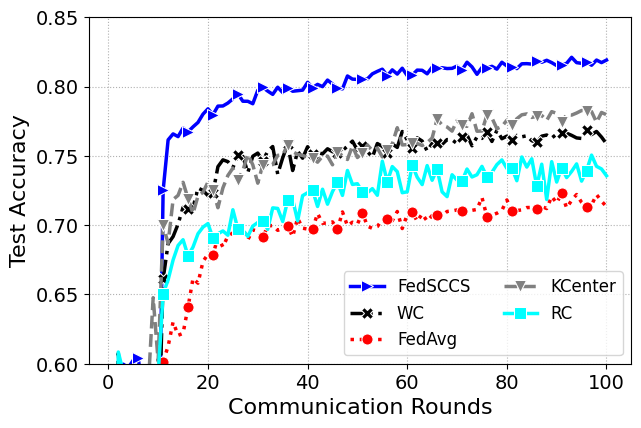

In [5]:
#comparando as soluções

n_clusters = 10
selection = 'All'
method = 'HC'

plt.figure(figsize = (7,4.5))

files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

solucoes = ['FedSCCS', 'WC', 'FedAvg' , 'KCenter' ,'RC']
colors =  {'FedSCCS':'blue', 'WC'   :'k', 'FedAvg':'r' , 'KCenter':'gray' ,'RC':'cyan'}
styles =  {'FedSCCS':'-', 'WC'   :'-.',   'FedAvg':':' ,    'KCenter':'--' ,  'RC':'-'}
markers = {'FedSCCS':'>', 'WC'   :'X',    'FedAvg':'o' ,    'KCenter':'v' ,   'RC':'s'}

for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds', legend='brief', label=sol,
                  linewidth = 2.5, color = colors[sol], linestyle = styles[sol], marker=markers[sol], markevery = 5, markersize = 8)


plt.ylim(0.6, 0.85)
plt.legend(ncol = 2, fontsize=12)
plt.grid(True, linestyle = ':')
plt.xlabel('Communication Rounds', size = 16)
plt.ylabel('Test Accuracy', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.savefig(f'figures/solutions_{selection}_CL.pdf', dpi = 600,bbox_inches='tight')
plt.show()


In [6]:
n_clusters = 10
selection = 'All'
method = 'HC'
model_size = 47192


costs = []
for n_clusters in [2,5,10,20]:
    cost =  {'FedSCCS':[], 'WC'   :[], 'FedAvg':[] , 'KCenter':[] ,'RC':[], 'n_clusters':list(np.ones(3)*n_clusters)}
    for selection in ['All', 'POC', 'Random']:
        files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
                'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
                'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/train/acc_24clients_1clusters.csv',
                'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
                'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv'}

        solucoes = ['FedSCCS', 'WC', 'FedAvg' , 'KCenter' ,'RC']
        colors =  {'FedSCCS':'blue', 'WC'   :'gold', 'FedAvg':'r' , 'KCenter':'gray' ,'RC':'lime'}

        for sol in solucoes:
            print(files[sol])
            acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
            print(len(acc))


            c = acc.groupby('rounds').count()['client'].sum() * model_size / 10e6
            cost[sol].append(c)
    
    costs.append(cost)


simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/train/acc_24clients_2clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/train/acc_24clients_2clusters.csv
2399
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/train/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-KCenter-All-0.5/train/acc_24clients_2clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/train/acc_24clients_2clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-POC-0.5/train/acc_24clients_2clusters.csv
1320
simulation1/local_logs/MotionSense/weights-(-1)-HC-POC-0.5/train/acc_24clients_2clusters.csv
1320
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/train/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-KCenter-POC-0.5/train/acc_24clients_2clusters.csv
1320
simulation1/local_logs/MotionSense/CKA-(-1)-Random-POC-0.5/train/acc_24clients_2clusters.csv
1230
simulation1/local_

In [7]:
cost = pd.DataFrame(cost).set_index([['All', 'POC', 'Random']])
cost

,FedSCCS,WC,FedAvg,KCenter,RC,n_clusters
All,11.326080,11.326080,11.32608,11.326080,11.326080,20.0
POC,9.627168,10.051896,11.32608,9.622449,9.627168,20.0
Random,9.627168,9.627168,11.32608,9.627168,9.627168,20.0


In [8]:
cost = pd.DataFrame()
for c in costs:
    cost = pd.concat([cost,pd.DataFrame(c)])

In [9]:
cost = cost.reset_index()


In [10]:
cost = pd.melt(cost, id_vars = ['index', 'n_clusters'], value_vars=solucoes)

In [11]:
cost.head()

,index,n_clusters,variable,value
0,0,2.0,FedSCCS,11.326080
1,1,2.0,FedSCCS,6.229344
2,2,2.0,FedSCCS,1.982064
3,0,5.0,FedSCCS,11.326080
4,1,5.0,FedSCCS,5.804616


In [12]:
cost['index'] = cost['index'].map({0:'FedAvg',
                                1:'POC', 
                                2:'Random'})
cost['Selection'] = cost['index']

In [13]:
cost['n_clusters'] = cost['n_clusters'].apply(lambda x: int(x))

In [14]:
cost.head()

,index,n_clusters,variable,value,Selection
0,FedAvg,2,FedSCCS,11.326080,FedAvg
1,POC,2,FedSCCS,6.229344,POC
2,Random,2,FedSCCS,1.982064,Random
3,FedAvg,5,FedSCCS,11.326080,FedAvg
4,POC,5,FedSCCS,5.804616,POC


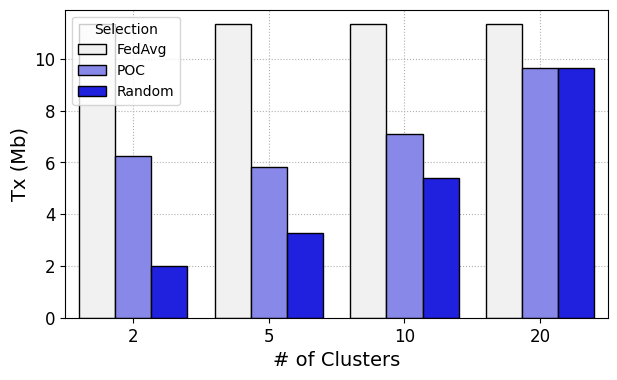

In [15]:
plt.figure(figsize=(7,4))
plt.rc('axes', axisbelow=True)
sns.barplot(cost[cost['variable'] == 'FedSCCS'], y = 'value', x = 'n_clusters', hue = 'Selection',
            edgecolor='k', color= 'b')
plt.grid(True, linestyle = ':')
#0 == All
#1 == POC
#2 == Random 
plt.xlabel('# of Clusters', fontsize = 14)
plt.ylabel('Tx (Mb)', fontsize = 14)

plt.xticks(fontsize  = 12)
plt.yticks(fontsize  = 12)

plt.savefig('figures/comm.pdf', dpi = 600, bbox_inches='tight')


simulation1/local_logs/MotionSense/CKA-(-1)-HC-Random-0.5/train/acc_24clients_10clusters.csv
1140
simulation1/local_logs/MotionSense/CKA-(-1)-HC-POC-0.5/train/acc_24clients_10clusters.csv
1500
0.02921344435116884


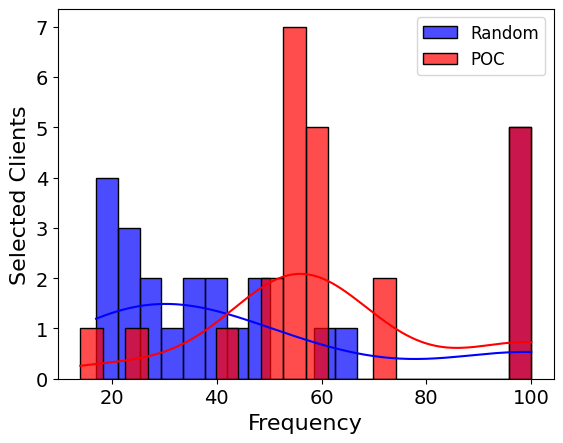

In [ ]:
n_clusters = 10
selection = 'Random'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

sol = 'FedSCCS'
print(files[sol])
acc2 =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
print(len(acc2))

#print(np.std(acc2[acc2['rounds'] == 100]['acc']))
sns.histplot(acc2.groupby('client').count()['rounds'], bins=20, kde = True, alpha = 0.7, label = 'Random',color = 'blue')
#plt.hist(acc2.groupby('client').count()['rounds'], bins = 20, alpha = 0.4, label= 'Random')
plt.xlabel('# of rounds selected', size = 22)
plt.ylabel('# of clients that were selected', size = 22)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.savefig('figures/rounds_client_POC.pdf', dpi = 600)


n_clusters = 10
selection = 'POC'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

sol = 'FedSCCS'
print(files[sol])
acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
print(len(acc))

print(np.std(acc[acc['rounds'] == 100]['acc']))
sns.histplot(acc.groupby('client').count()['rounds'], bins=20, kde = True, alpha = 0.7, label = 'POC', color = 'red')
#plt.hist(acc.groupby('client').count()['rounds'], bins = 20, alpha=0.4, label='POC')
plt.xlabel('Frequency', size = 16)
plt.ylabel('Selected Clients', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.savefig('figures/rounds_client_Random.pdf', dpi = 600)
plt.legend( fontsize = 12)
plt.savefig('figures/rounds_client_Random_POC.pdf', dpi = 600,  bbox_inches='tight')
plt.show()

simulation1/local_logs/MotionSense/CKA-(-1)-HC-Random-0.5/train/acc_24clients_10clusters.csv
1140
simulation1/local_logs/MotionSense/CKA-(-1)-HC-POC-0.5/train/acc_24clients_10clusters.csv
1500
0.02921344435116884


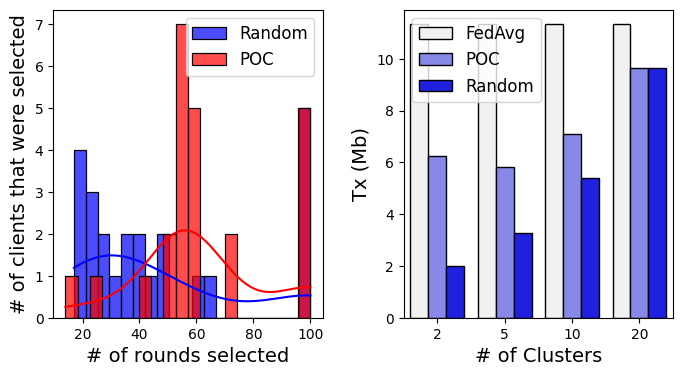

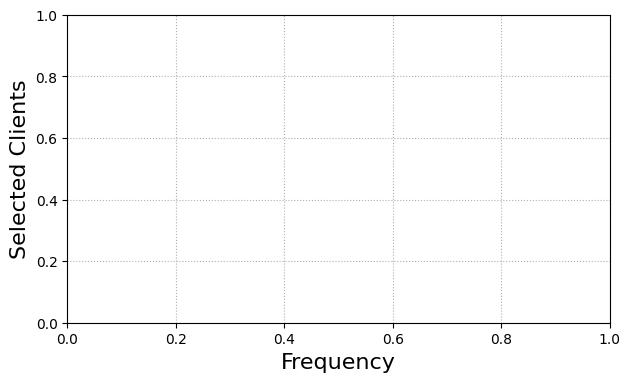

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4))
plt.subplots_adjust(wspace=0.3, hspace=0)

plt.figure(figsize=(7,4))
plt.rc('axes', axisbelow=True)
sns.barplot(cost[cost['variable'] == 'FedSCCS'], y = 'value', x = 'n_clusters', hue = 'Selection',
            edgecolor='k', color= 'b', ax = ax2)
plt.grid(True, linestyle = ':')
#0 == All
#1 == POC
#2 == Random 
ax2.set_xlabel('# of Clusters', fontsize = 14)
ax2.set_ylabel('Tx (Mb)', fontsize = 14)
ax2.legend(fontsize = 12)


#ax1.set_xticks(fontsize  = 12)
#ax1.set_yticks(fontsize  = 12)

n_clusters = 10
selection = 'Random'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

sol = 'FedSCCS'
print(files[sol])
acc2 =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
print(len(acc2))

#print(np.std(acc2[acc2['rounds'] == 100]['acc']))
sns.histplot(acc2.groupby('client').count()['rounds'], bins=20, kde = True, alpha = 0.7, label = 'Random',color = 'blue', ax=ax1)
#plt.hist(acc2.groupby('client').count()['rounds'], bins = 20, alpha = 0.4, label= 'Random')
ax1.set_xlabel('# of rounds selected', size = 14)
ax1.set_ylabel('# of clients that were selected', size = 14)
#ax2.set_xticks(size = 14)
#ax2.set_yticks(size = 14)
#plt.savefig('figures/rounds_client_POC.pdf', dpi = 600)


n_clusters = 10
selection = 'POC'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

sol = 'FedSCCS'
print(files[sol])
acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
print(len(acc))

print(np.std(acc[acc['rounds'] == 100]['acc']))
sns.histplot(acc.groupby('client').count()['rounds'], bins=20, kde = True, alpha = 0.7, label = 'POC', color = 'red', ax = ax1)
#plt.hist(acc.groupby('client').count()['rounds'], bins = 20, alpha=0.4, label='POC')
plt.xlabel('Frequency', size = 16)
plt.ylabel('Selected Clients', size = 16)
#plt.xticks(size = 14)
#plt.yticks(size = 14)
#plt.savefig('figures/rounds_client_Random.pdf', dpi = 600)
ax1.legend( fontsize = 12)
plt.savefig('figures/juntas.pdf', dpi = 600,  bbox_inches='tight')
plt.show()